In [1]:
'''Onling Gaming Anxiety'''

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn import linear_model
%matplotlib inline

In [2]:
def check_data():
    '''check working directory and data set uploaded correctly'''
    print (f"The current working directory: {(os.getcwd())}")
    print()
    data = pd.read_csv('GamingStudy_data.csv', encoding='ISO-8859-1')
    print ("The first few lines of data:")
    print(data.head())
    print()

    return data

In [3]:
def cleaning(data):
    '''Creating copies of cleaned dataset with some removed NAs
    and remove rows with participant gaming over 168 hours per week, since that is impossible'''

    data = data[~(data['Hours'] > 168)]
    
    data_no_na = data.copy()
    data_no_na = data_no_na[['SPIN_T', 'SWL_T', 'GAD_T','Narcissism', 'Hours']].dropna()

    return data, data_no_na

In [4]:
def quantitative_cleaning(data):
    '''Produces data set for quantative summary statistics analyses'''
    quantitative_data = data[['Age', 'Hours', 'streams', 'Narcissism', 'GAD_T', 'SWL_T', 'SPIN_T']].copy()
    return quantitative_data

In [5]:
def qualitative_cleaning(data):
    '''Produces data set for qualitative summary statistics analyses'''
    qualitative_data = data[['S. No.','GADE','Game','Platform','earnings','whyplay','League','Gender','Work','Degree','Residence','Birthplace','Playstyle']].copy()
    qualitative_graph_data = data[['S. No.','GADE', 'Game', 'Platform', 'Gender', 'Work', 'Degree', 'Birthplace', 'Residence']].copy()
    
    return qualitative_data, qualitative_graph_data

In [6]:
def quantitative_summary(quantitative_data):
    '''quantitative summary summaries'''
    
    print('\n' * 3)
    print('Quantitative summary summaries:')
        
    print()
    descriptions_quantitative = ["Age summary statistics", "Hours is hours of gaming per week",
    "Streams is hours per week watching gaming streams and giving or receiving coaching"
    , "Narcissism is the score from The Single Item Narcissism Scale"
    , "GAD_T is the overall score for each participant's Generalized Anxiety Disorder questionnaire (measures generalized anxiety)"
    , "SWL_T is the overall score for each participant's Satisfaction with Life Scale questionnaire (measures life satisfaction)"
    , "SPIN_T is the overall score for each participant's Social Phobia Inventory questionnaire (measures social phobia)"]
    i = 0
    
    for quantitative_variable in quantitative_data:
        print(descriptions_quantitative[i])
        print(quantitative_data[quantitative_variable].describe())
        i += 1
        print()

In [7]:
def qualitative_summary(qualitative_data):
    '''Frequency of qualitative variables'''
    
    print('\n' * 3)
    print('Qualitative variables summary:')
    print()

    descriptions_qualitative = ["S. No counts number of participants", "GADE is a measure of how difficult has gaming made their 'work, take care of things at home, or get along with other people'"
    , "Game is game the participant plays 'most regularly at the moment'", "Platform is which platform the participant usually uses for gaming"
    , "Earnings is whether the participant makes money from gaming or gaming is a hobby", "whyplay asks participants why participants game"
    , "League asks participants what league a player is in if the participants plays League of Legends"
    , "Gender summary statistics", "Work asks particpants for their current work and student status"
    , "Degree asks participants for their highest educational degree", "Residence asks particpants what country they currently live in"
    , "Birthplace asks participants their country of birth", "Playstyle asks participants what their usual gaming playstyle is"]
    i = 0
    
    for qualitative_variable in qualitative_data:
        print(descriptions_qualitative[i])
        print(qualitative_data.groupby(qualitative_variable)['S. No.'].count())
        print()
        i += 1

In [8]:
def correlation(data_no_na):
    '''Correlations with hours gaming per week as independent variable with p-values''' 

    print('\n' * 3)
    
    definitions_correlation = ['SPIN_T is the overall score for social phoiba (from the Social Phobia Inventory)'
                               ,'SWL_T is overall score measuring life satisfaction (from Satisfaction with Life Scale)'
                               ,'GAD_T (Generalized Anxiety Disorder 7) is overall score for questionnaire that measures general anxiety'
                               ,'Narcissism score (from The Single Item Narcissism Scale)'] 
    data_no_na_headings = data_no_na.columns.tolist()
    hours_column = data_no_na["Hours"]
    i = 0
    
    print('Correlations with hours gaming per week as independent variable with p-values')
    print('Note: Correlation is first number, p-value is second number')
    print()
    
    for correlation_variable in data_no_na_headings[0:4]:
        print(definitions_correlation[i])
        print(f"Pearson correlation between hours gaming per week and {data_no_na_headings[i]} with p-value")
        dependent_variable = data_no_na[data_no_na_headings[i]]
        print(pearsonr(dependent_variable, hours_column))
        print()
        i += 1

In [9]:
def quantitative_graphs(quantitative_data):
    '''plotting quantitative variables on graphs'''
    
    print('\n' * 3)
    print('Plotting quantitative variables on graphs')
    print()
    
    for quantitative_variable in quantitative_data:
        if quantitative_variable != 'Narcissism':
            axes = plt.axes()
            axes.grid
            axes.hist(quantitative_data[quantitative_variable])
            axes.set_title(f"{quantitative_variable} Histogram")
            axes.set_xlabel(f"{quantitative_variable}")
            axes.set_ylabel('Number of participants')
            plt.show()
        else:
            axes_two = plt.axes()
            axes_two.set_title(f"{quantitative_variable} Bar Graph")
            quantitative_data[quantitative_variable].value_counts().plot(kind='bar')
            axes_two.set_xlabel(quantitative_variable)
            axes_two.set_ylabel("Number of participants")
            plt.show()

In [10]:
def qualitative_graphs(qualitative_graph_data):
    '''Creating graphs with qualitative variables'''
    
    print('\n' * 3)
    print('Creating graphs with qualitative variables')
    print()
    qualitative_graph_variables = qualitative_graph_data.columns.tolist()
    

    for graph_variable in qualitative_graph_variables [1:]:
        axes_two = plt.axes()
        axes_two.set_title(f"{graph_variable} Bar Graph")
        qualitative_graph_data[graph_variable].value_counts().plot(kind='bar')
        axes_two.set_xlabel(graph_variable)
        axes_two.set_ylabel(f"Number of each {graph_variable}")
        plt.show()

In [11]:
def correlation_graphs(data_no_na):
    '''scatterplots for correlations'''
    
    print('\n' * 3)
    print('Scatterplots for hours gaming per week as independent variable, and SPIN_T, SWL_T, GAD_T, and Narcissism as dependent variables')
    print()
    
    data_no_na_hours = data_no_na[['SPIN_T', 'SWL_T', 'GAD_T','Narcissism']].copy()
    
    for independent_variable in data_no_na_hours:
        axes_three = plt.axes()
        x = data_no_na['Hours']
        y = data_no_na[independent_variable]
        axes_three.set_title(f"Hours and {independent_variable} Scatterplot")
        axes_three.set_xlabel('Hours')
        axes_three.set_ylabel(f"Number of each {independent_variable}")
        axes_three.scatter(x,y)
        plt.show()

In [12]:
def multi_linear(quantitative_data):
    '''calculating multiple linear regression'''
    print('\n' * 3)
    print('Multiple linear regression outputs:')
    print()
    
    quantitative_data = quantitative_data[['Age', 'Hours', 'streams', 'Narcissism', 'GAD_T', 'SWL_T', 'SPIN_T']].dropna()
    x = quantitative_data[['Age', 'Hours', 'streams', 'Narcissism', 'GAD_T', 'SWL_T']]
    y = quantitative_data['SPIN_T']
    list_y = quantitative_data[['SPIN_T']].columns.tolist()
    multi_linear_production(x,y,list_y)
    
    x = quantitative_data[['Age', 'Hours', 'streams', 'Narcissism', 'GAD_T','SPIN_T']]
    y = quantitative_data['SWL_T']
    list_y = quantitative_data[['SWL_T']].columns.tolist()
    multi_linear_production(x,y,list_y)
    
    x = quantitative_data[['Age', 'Hours', 'streams', 'Narcissism', 'SWL_T','SPIN_T']]
    y = quantitative_data['GAD_T']
    list_y = quantitative_data[['GAD_T']].columns.tolist()
    multi_linear_production(x,y,list_y)
    
    x = quantitative_data[['Age', 'Hours', 'streams', 'GAD_T', 'SWL_T','SPIN_T']]
    y = quantitative_data['Narcissism']
    list_y = quantitative_data[['Narcissism']].columns.tolist()
    multi_linear_production(x,y,list_y)

In [13]:
def multi_linear_production(x,y,list_y):
    '''using sklearn for multiple linear regression and print output'''
    list_x = x.columns.tolist()
    i = 0
    multi_linear = linear_model.LinearRegression()
    multi_linear.fit(x,y)
    for variable in list_x:
        print(f"As {variable} increases by one, {list_y[0]} changes by {multi_linear.coef_[i]:.3f} (3 d.p).")
        i += 1
    print('\n' * 3)

The current working directory: C:\Users\Allan\Desktop\Allan\UC 2021\COSC480\Project\Project full analysis\FINAL PROJECT

The first few lines of data:
   S. No.    Timestamp  GAD1  GAD2  GAD3  GAD4  GAD5  GAD6  GAD7  \
0       1  42052.00437     0     0     0     0     1     0     0   
1       2  42052.00680     1     2     2     2     0     1     0   
2       3  42052.03860     0     2     2     0     0     3     1   
3       4  42052.06804     0     0     0     0     0     0     0   
4       5  42052.08948     2     1     2     2     2     3     2   

                   GADE  ...  Birthplace    Residence  Reference  \
0  Not difficult at all  ...         USA          USA     Reddit   
1    Somewhat difficult  ...         USA          USA     Reddit   
2  Not difficult at all  ...     Germany      Germany     Reddit   
3  Not difficult at all  ...         USA          USA     Reddit   
4        Very difficult  ...         USA  South Korea     Reddit   

                                

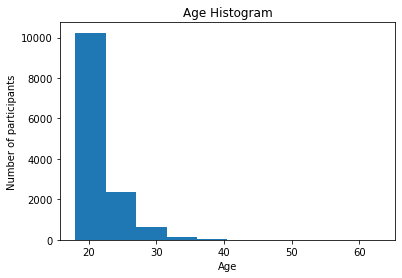

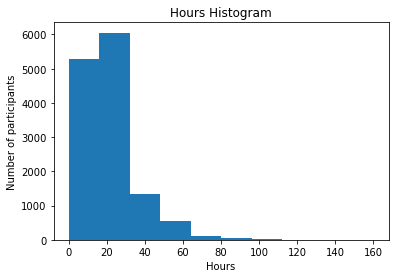

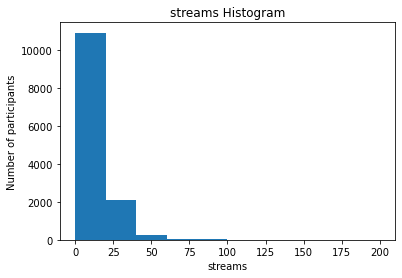

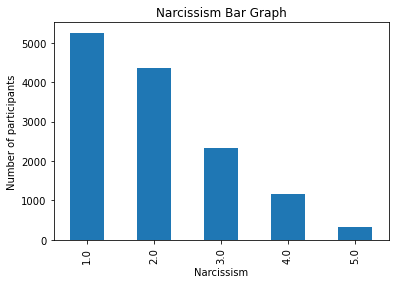

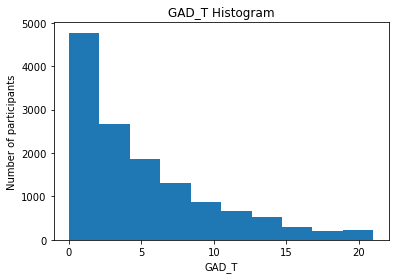

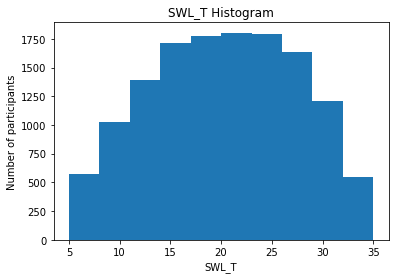

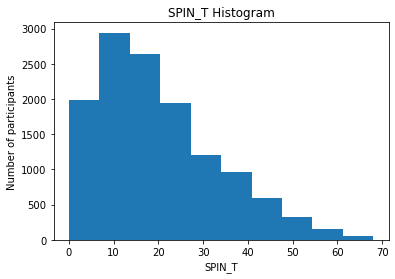





Creating graphs with qualitative variables



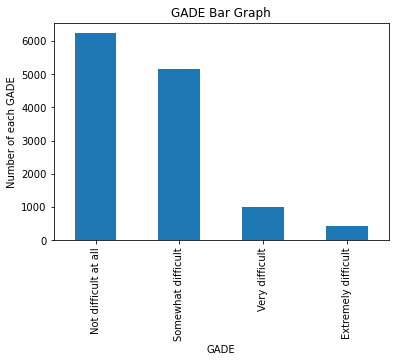

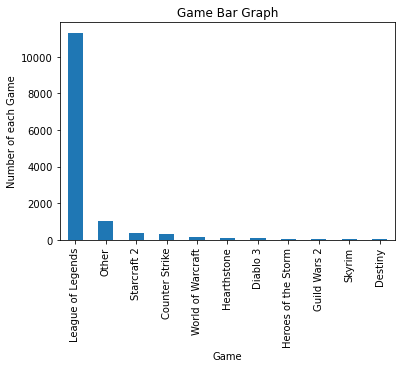

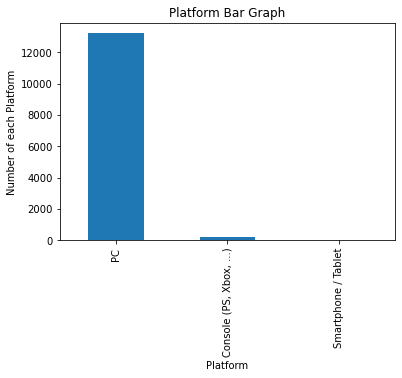

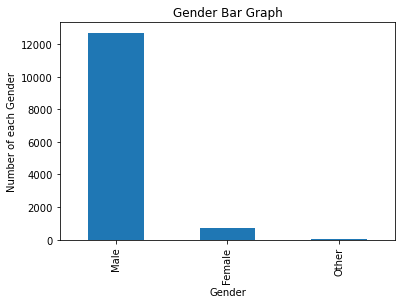

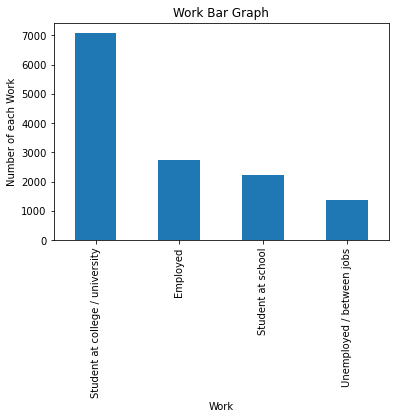

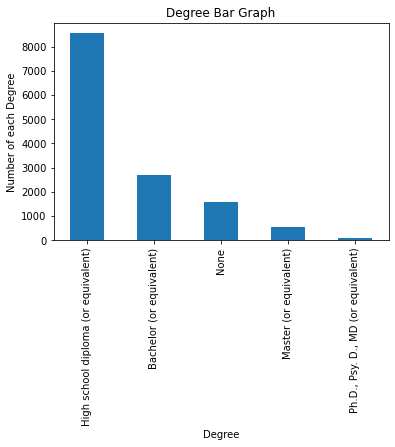

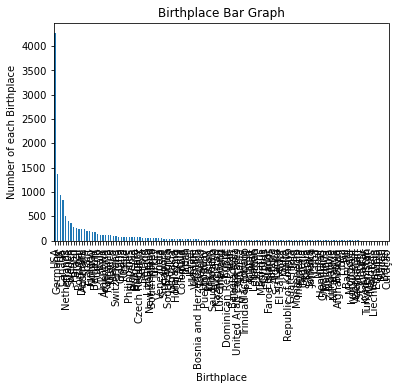

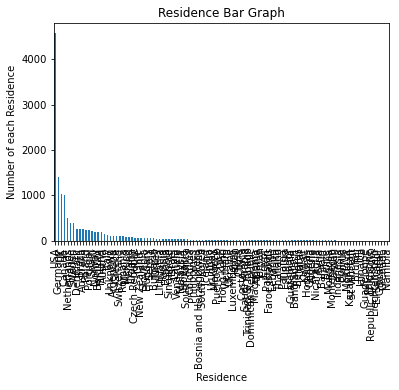





Scatterplots for hours gaming per week as independent variable, and SPIN_T, SWL_T, GAD_T, and Narcissism as dependent variables



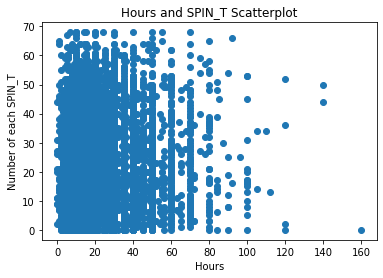

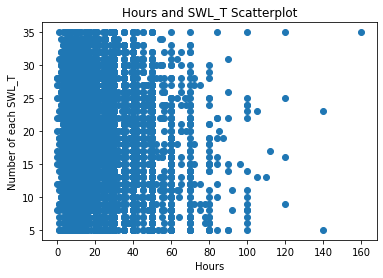

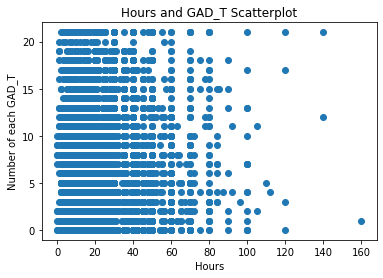

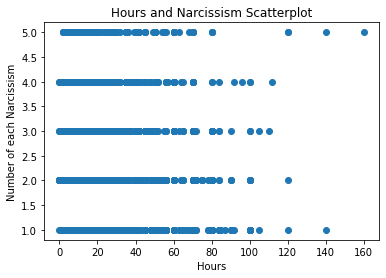





Multiple linear regression outputs:

As Age increases by one, SPIN_T changes by -0.357 (3 d.p).
As Hours increases by one, SPIN_T changes by 0.028 (3 d.p).
As streams increases by one, SPIN_T changes by 0.044 (3 d.p).
As Narcissism increases by one, SPIN_T changes by -0.541 (3 d.p).
As GAD_T increases by one, SPIN_T changes by 1.101 (3 d.p).
As SWL_T increases by one, SPIN_T changes by -0.289 (3 d.p).




As Age increases by one, SWL_T changes by -0.061 (3 d.p).
As Hours increases by one, SWL_T changes by -0.043 (3 d.p).
As streams increases by one, SWL_T changes by -0.018 (3 d.p).
As Narcissism increases by one, SWL_T changes by 0.110 (3 d.p).
As GAD_T increases by one, SWL_T changes by -0.496 (3 d.p).
As SPIN_T increases by one, SWL_T changes by -0.089 (3 d.p).




As Age increases by one, GAD_T changes by 0.003 (3 d.p).
As Hours increases by one, GAD_T changes by 0.007 (3 d.p).
As streams increases by one, GAD_T changes by 0.010 (3 d.p).
As Narcissism increases by one, GAD_T cha

In [14]:
def main():
    '''main function'''
    data = check_data()
    data, data_no_na = cleaning(data)
    quantitative_data = quantitative_cleaning(data)
    qualitative_data, qualitative_graph_data = qualitative_cleaning(data)
    quantitative_summary(quantitative_data)
    qualitative_summary(qualitative_data)
    correlation(data_no_na)
    quantitative_graphs(quantitative_data)
    qualitative_graphs(qualitative_graph_data)
    correlation_graphs(data_no_na)
    multi_linear(quantitative_data)
    
main()